In [1]:
import glob
import numpy
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
def _check(m):
    ret = dict()

    x = m
    ret['x'] = float((x > 65536).sum() > 0)

    x = m / m.shape[-1]
    ret['1/n * x'] = float((x > 65536).sum() > 0)
    
    x = x * m
    ret['1/n * x * x'] = float((x > 65536).sum() > 0)
    
    x = x.sum(axis=-1)
    ret['(1/n * x * x).sum()'] = float((x > 65536).sum() > 0)
    
    return ret

In [3]:
stat = list()
for f in glob.glob('layernorm.bak/conv2d6x22/*/*.npy'):
    m = numpy.load(f)
    stat.append(_check(m))

In [4]:
df = pd.DataFrame.from_dict(stat)

In [5]:
df.sum()

x                          0.0
1/n * x                    0.0
1/n * x * x            39895.0
(1/n * x * x).sum()    39895.0
dtype: float64

In [6]:
df.shape

(582467, 4)

In [7]:
39895.0 / 582467

0.0684931506849315

In [8]:
for conf in ['conv2d6x1', 'dws2d6x22', 'dws2d6x1']:
    stat = list()
    for f in glob.glob(f'layernorm.bak/{conf}/*/*.npy'):
        m = numpy.load(f)
        stat.append(_check(m))
    df = pd.DataFrame.from_dict(stat)
    print(conf, df.shape)
    print(df.sum())

conv2d6x1 (582467, 4)
x                          0.0
1/n * x                    0.0
1/n * x * x                0.0
(1/n * x * x).sum()    18999.0
dtype: float64
dws2d6x22 (582467, 4)
x                          0.0
1/n * x                    0.0
1/n * x * x            37481.0
(1/n * x * x).sum()    39895.0
dtype: float64
dws2d6x1 (582467, 4)
x                         0.0
1/n * x                   0.0
1/n * x * x               0.0
(1/n * x * x).sum()    1475.0
dtype: float64


In [9]:
18999.0 / 582467, 39895.0 / 582467, 1475.0 / 582467

(0.03261815690846005, 0.0684931506849315, 0.002532332303804336)

In [10]:
data = dict()
for conf in ['conv2d6x1', 'conv2d6x22', 'dws2d6x22', 'dws2d6x1']:
    array = list()
    for f in glob.glob(f'layernorm.bak/{conf}/*/*.npy'):
        m = numpy.load(f)
        array.append(numpy.absolute(m).max())
    data[conf] = array

<Figure size 640x480 with 0 Axes>

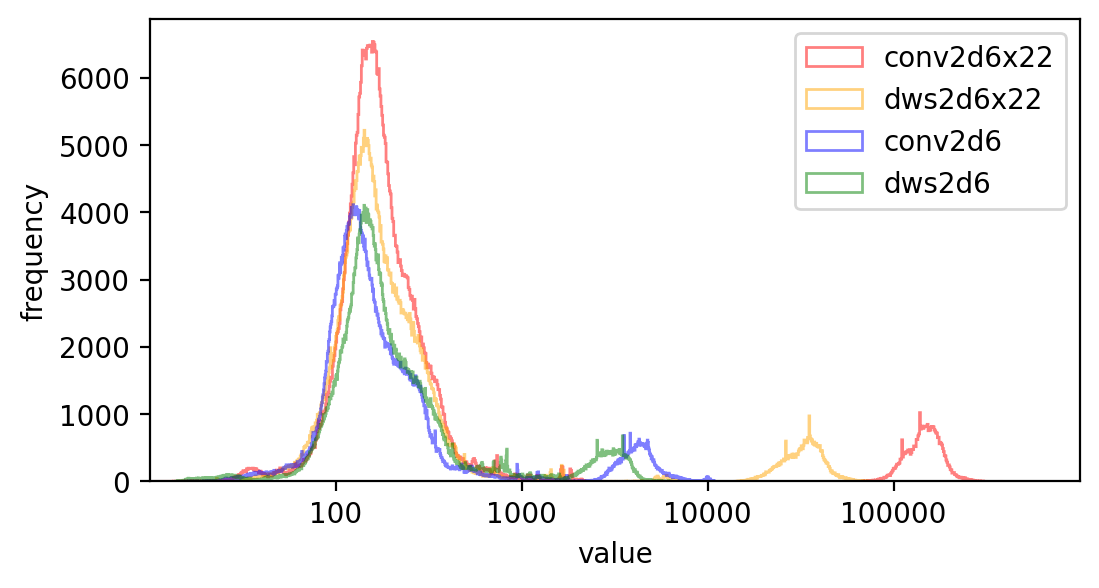

In [15]:
plt.clf()

plt.figure(figsize=(6,3), dpi=200)

plt.hist(numpy.log(data['conv2d6x22']), alpha=0.5, bins=1000, label='conv2d6x22', color='red', histtype='step')
plt.hist(numpy.log(data['dws2d6x22']), alpha=0.5, bins=1000, label='dws2d6x22', color='orange', histtype='step')
plt.hist(numpy.log(data['conv2d6x1']), alpha=0.5, bins=1000, label='conv2d6', color='blue', histtype='step')
plt.hist(numpy.log(data['dws2d6x1']), alpha=0.5, bins=1000, label='dws2d6', color='green', histtype='step')

plt.xlim([2, 12])
plt.xticks([4, 6, 8, 10], ['100', '1000', '10000', '100000'])
           # , rotation=45)
plt.legend(loc='upper right')
plt.xlabel('value')
plt.ylabel('frequency')
plt.savefig('layernorm-step.png', dpi=300, pad_inches=0, bbox_inches='tight')
plt.show()

In [12]:
from scipy import stats

alex = dict()
for conf in ['dws2d6x22', 'dws2d6x1', 'conv2d6x22', 'conv2d6x1']:
    stat = list()
    for f in glob.glob(f'layernorm.bak/{conf}/*/*.npy'):
        m = numpy.load(f)[0]
        m = (m - m.mean(axis=-1, keepdims=True)) / m.std(axis=-1, keepdims=True)
        for x in m:
            # stat.append(stats.kstest(x, stats.norm.cdf))
            stat.append(stats.kstest(x, stats.uniform.cdf))
        break
    alex[conf] = stat

In [13]:
pprint(alex)

Pretty printing has been turned OFF
